In [6]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np  
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

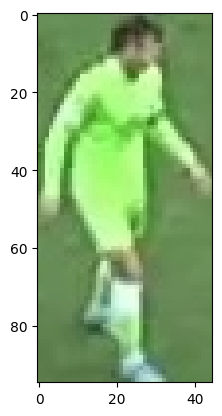

In [3]:
plt.imshow(image)
plt.show()

# take the top half of the img

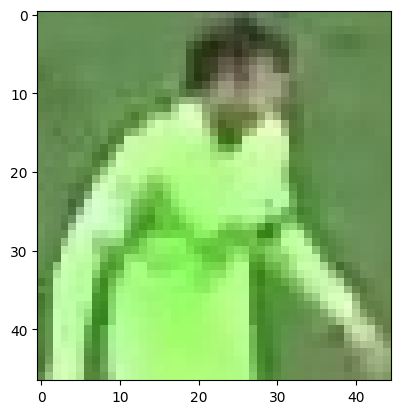

In [4]:
top_half_image= image[0:int(image.shape[0]/2),:] #all x and half y
plt.imshow(top_half_image)

# Cluster the img into two clusters

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


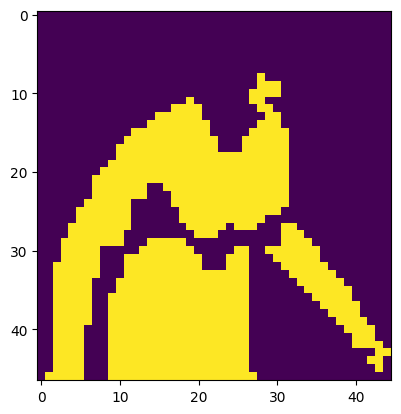

In [7]:
# Reshape the img 
image_2d = top_half_image.reshape(-1,3)

#perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)
# get the cluster labels

labels = kmeans.labels_
#reshape the labels into the original img shape
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [8]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster= max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

0


In [9]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [12]:
kmeans.cluster_centers_[player_cluster]

array([176.05331599, 242.65669701, 140.44083225])